In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Number of GPUs available:", len(physical_devices))
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


Number of GPUs available: 0


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = "data/MobileNet-samples/"
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

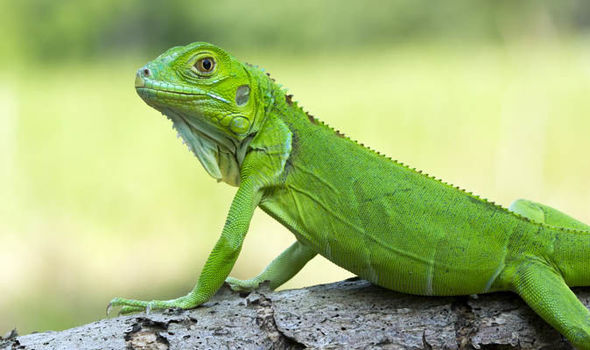

In [5]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/1.jpg", width=300, height=300)

In [6]:
preprocessed_image = prepare_image("1.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01693334', 'green_lizard', 0.65029114),
  ('n01677366', 'common_iguana', 0.32221663),
  ('n01682714', 'American_chameleon', 0.0129458485),
  ('n01687978', 'agama', 0.009446073),
  ('n01688243', 'frilled_lizard', 0.0032794846)]]

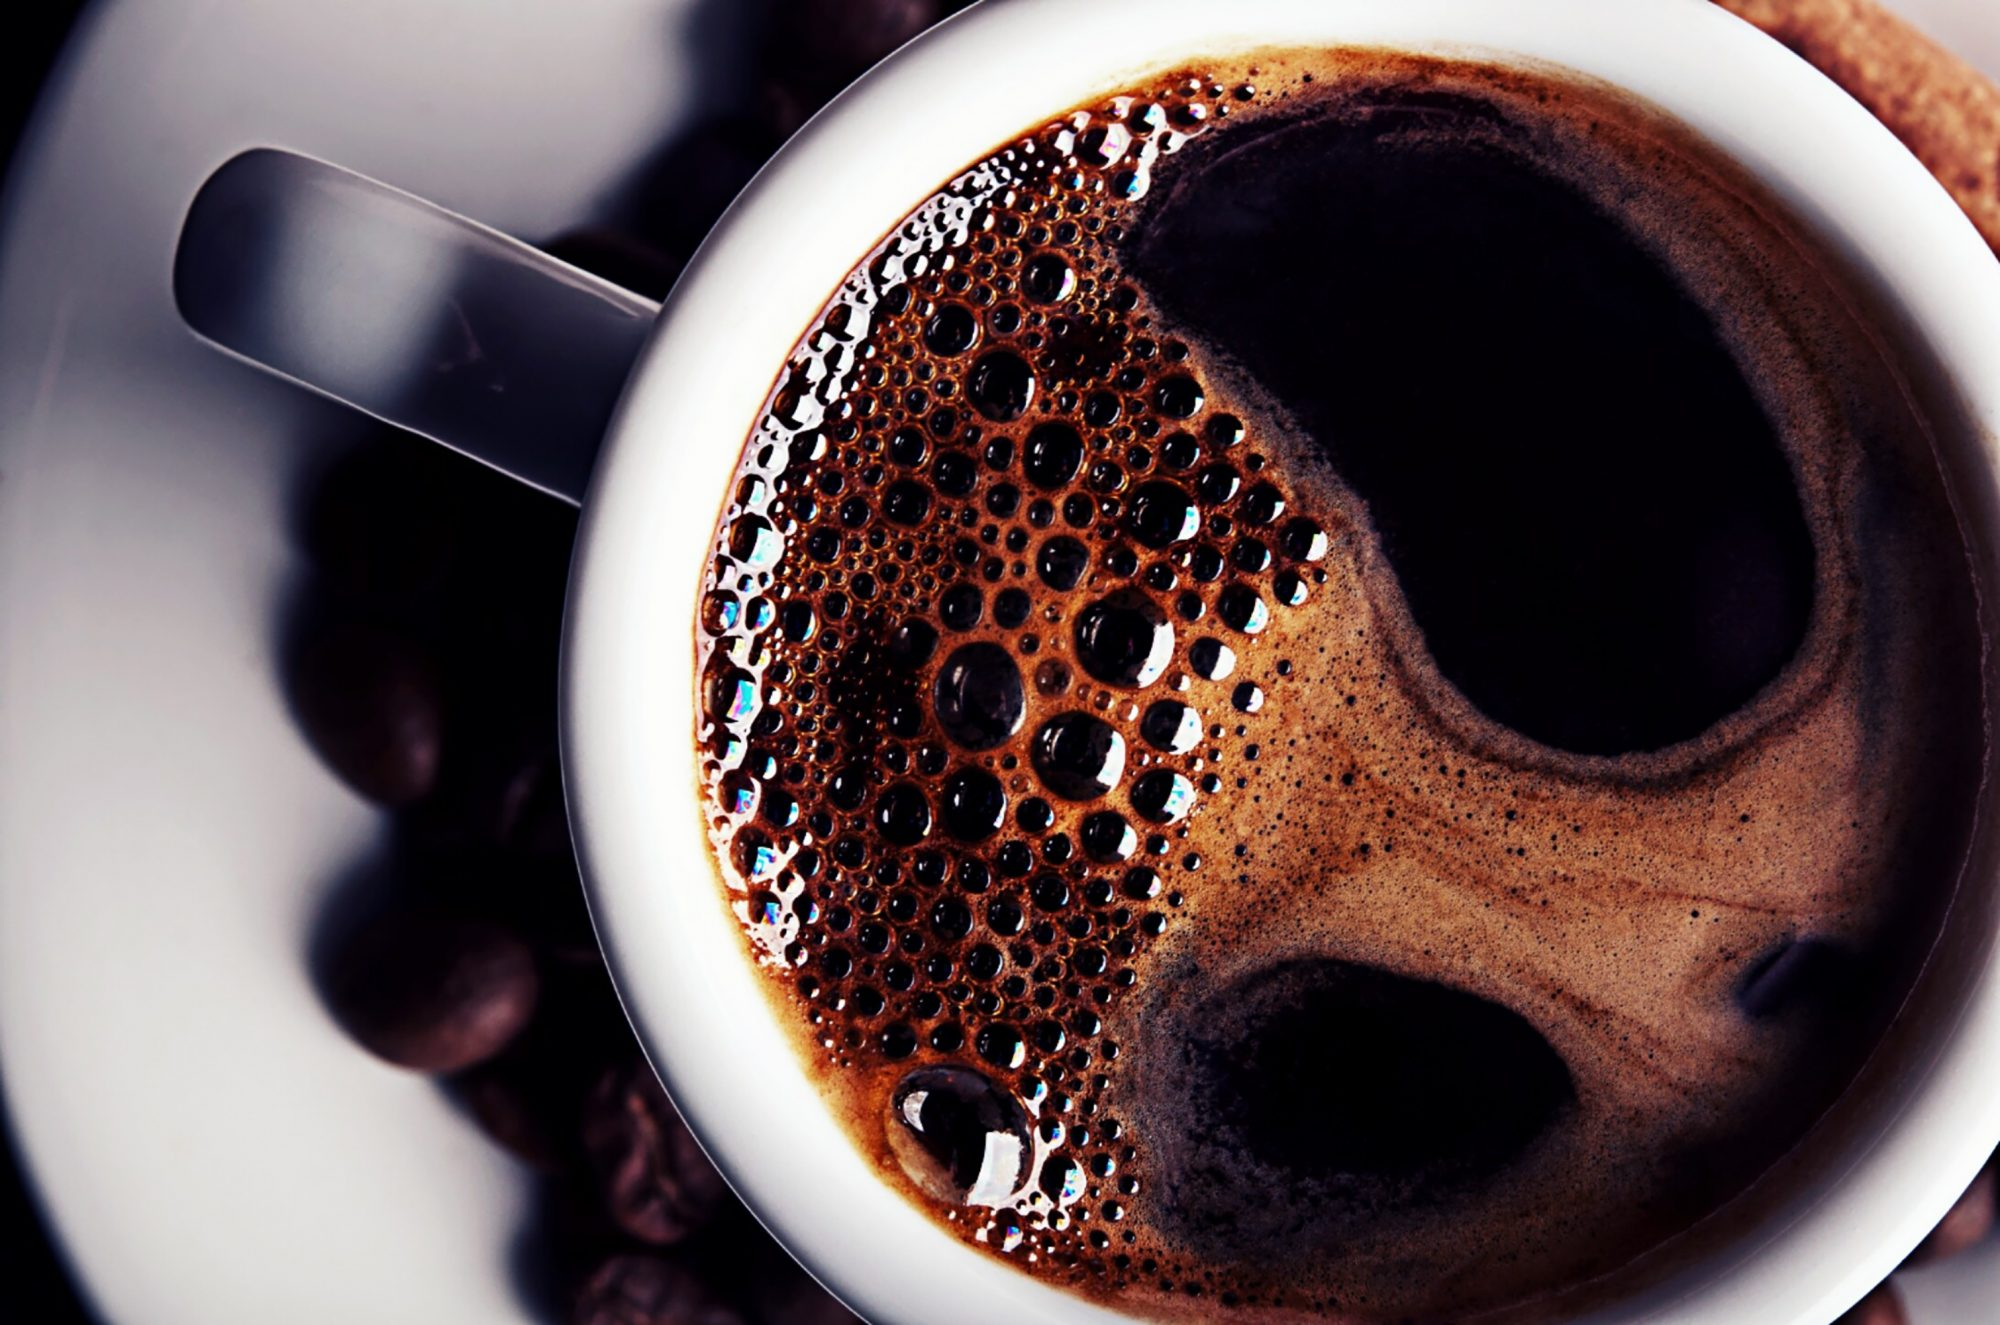

In [7]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/2.jpg", width=300, height=300)

In [8]:
preprocessed_image = prepare_image("2.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03063599', 'coffee_mug', 0.74386626),
  ('n07920052', 'espresso', 0.09565411),
  ('n04332243', 'strainer', 0.080351114),
  ('n07930864', 'cup', 0.053739227),
  ('n02974003', 'car_wheel', 0.013755989)]]

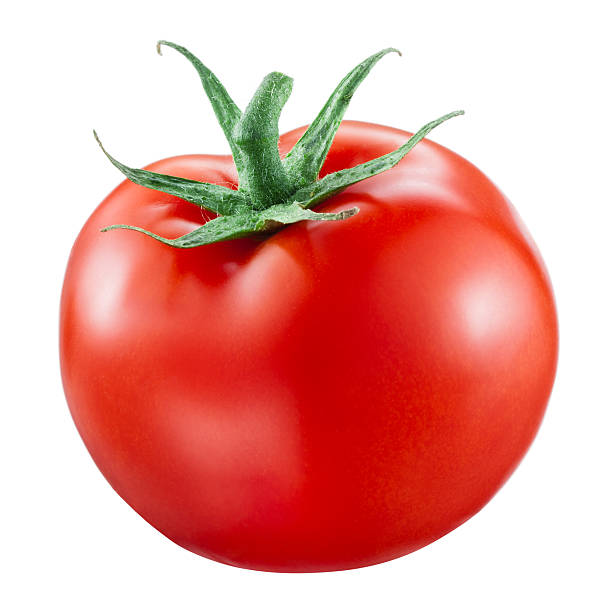

In [9]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/3.jpg", width=300, height=300)

In [10]:
preprocessed_image = prepare_image("3.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n12620546', 'hip', 0.3775298),
  ('n07742313', 'Granny_Smith', 0.3078242),
  ('n07720875', 'bell_pepper', 0.19389676),
  ('n04522168', 'vase', 0.022539519),
  ('n02948072', 'candle', 0.014834905)]]